In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline
svm1 = svm.SVC(C=1, gamma=0.0001, probability=True, kernel = 'linear')
nb = GaussianNB(var_smoothing=1.873817422860383e-08)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=8,
                       splitter='random')
lrr = LogisticRegression(C=0.0005, max_iter=2011, multi_class='ovr',
                   solver='newton-cg')
lr = LogisticRegression()
svm2 = svm.SVC(probability=True)
bagging = BaggingClassifier()
boosting = GradientBoostingClassifier()
stacking = StackingClassifier(classifiers=[svm1, nb, knn, dt, lrr], meta_classifier = svm2)

In [2]:
data = pd.read_csv('Lucene.csv')
data.shape

(691, 62)

In [3]:
data.describe()

ck_oo_numberOfPrivateMethods   LDHH_lcom  LDHH_fanIn  \
count                    691.000000  691.000000  691.000000   
mean                       1.327062    0.002367    0.007577   
std                        4.301345    0.006803    0.019344   
min                        0.000000    0.000000    0.000000   
25%                        0.000000    0.000000    0.000000   
50%                        0.000000    0.000000    0.000000   
75%                        1.000000    0.001062    0.002874   
max                       47.000000    0.061262    0.153580   

       numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
count                         691.000000                     691.000000   
mean                            2.480463                       0.130087   
std                             4.958156                       0.540472   
min                             0.000000                       0.000000   
25%                             1.000000                       0.000000   
50%                             1.000000                       0.000000   
75%                             3.000000                       0.000000   
max                            81.000000                       7.140000   

       WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
count               691.000000   691.000000                  691.000000   
mean                  0.430666     0.076826                    0.001832   
std                   1.279472     0.240683                    0.005958   
min                   0.000000     0.000000                    0.000000   
25%                   0.000000     0.001391                    0.000000   
50%                   0.000000     0.012992                    0.000000   
75%                   0.000000     0.052888                    0.000000   
max                  15.390000     4.490230                    0.047750   

       WCHU_fanIn  LDHH_numberOfPrivateAttributes  ...  \
count  691.000000                      691.000000  ...   
mean     1.360724                        0.001264  ...   
std      3.896006                        0.004784  ...   
min      0.000000                        0.000000  ...   
25%      0.000000                        0.000000  ...   
50%      0.000000                        0.000000  ...   
75%      1.010000                        0.000000  ...   
max     37.800000                        0.042728  ...   

       numberOfBugsFoundUntil:  LDHH_fanOut  LDHH_numberOfMethodsInherited  \
count               691.000000   691.000000                     691.000000   
mean                  2.480463     0.003881                       0.011049   
std                   4.958156     0.008726                       0.010468   
min                   0.000000     0.000000                       0.000000   
25%                   1.000000     0.000000                       0.005149   
50%                   1.000000     0.000000                       0.010398   
75%                   3.000000     0.003144                       0.011057   
max                  81.000000     0.055021                       0.060079   

         LDHH_rfc  ck_oo_numberOfMethodsInherited  \
count  691.000000                      691.000000   
mean     0.005924                       20.441389   
std      0.011983                       14.520070   
min      0.000000                        0.000000   
25%      0.000000                        9.000000   
50%      0.000000                       15.000000   
75%      0.004300                       27.000000   
max      0.103692                      106.000000   

       ck_oo_numberOfPublicMethods    LDHH_cbo  WCHU_numberOfLinesOfCode  \
count                   691.000000  691.000000                691.000000   
mean                      4.780029    0.010603                  1.352142   
std                       5.376083    0.021103                  3.341937   
min                       0.000000    0.000000                  0.000000   
25%

In [4]:
data.head()

ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             0   0.000000     0.01525   
1                             0   0.000000     0.00000   
2                             7   0.002984     0.00000   
3                            12   0.000000     0.00000   
4                             0   0.000000     0.00000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  2                            0.0   
1                                  1                            0.0   
2                                  4                            0.0   
3                                  1                            0.0   
4                                  1                            0.0   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     0.00     0.033871                    0.002200   
1                     0.00     0.000518                    0.000000   
2                     1.01     0.318565                    0.003137   
3                     0.00     0.000833                    0.000000   
4                     0.00     0.076471                    0.000000   

   WCHU_fanIn  LDHH_numberOfPrivateAttributes  ...  LDHH_fanOut  \
0        4.04                        0.000000  ...     0.000000   
1        0.00                        0.000000  ...     0.000000   
2        0.00                        0.002748  ...     0.020279   
3        0.00                        0.000000  ...     0.000000   
4        0.00                        0.000000  ...     0.000000   

   LDHH_numberOfMethodsInherited  LDHH_rfc  ck_oo_numberOfMethodsInherited  \
0                       0.010398  0.000000                              18   
1                       0.000000  0.000000                               9   
2                       0.005149  0.002921                               9   
3                       0.000000  0.000000                              35   
4                       0.000000  0.000000                              15   

   ck_oo_numberOfPublicMethods  LDHH_cbo  WCHU_numberOfLinesOfCode  \
0                            3  0.015814                      0.00   
1                            0  0.000000                      0.00   
2                           12  0.015089                      1.16   
3                            1  0.000000                      0.00   
4                            6  0.000000                      0.00   

   CvsExpEntropy  LDHH_numberOfMethods  class  
0       0.016969              0.000000  clean  
1       0.045793              0.000000  clean  
2       0.069272              0.003155  clean  
3       0.099579              0.000000  clean  
4       0.067865              0.000000  clean  

[5 rows x 62 columns]

In [5]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
#             print(unique_elements)
            x = 1
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x -= 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())

   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             0   0.000000     0.01525   
1                             0   0.000000     0.00000   
2                             7   0.002984     0.00000   
3                            12   0.000000     0.00000   
4                             0   0.000000     0.00000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  2                            0.0   
1                                  1                            0.0   
2                                  4                            0.0   
3                                  1                            0.0   
4                                  1                            0.0   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     0.00     0.033871                    0.002200   
1                     0.00     0.000518                    0.000000   
2          

In [6]:
array = data.values
X = array[:,0:61]
Y = array[:,61]

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = bagging
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

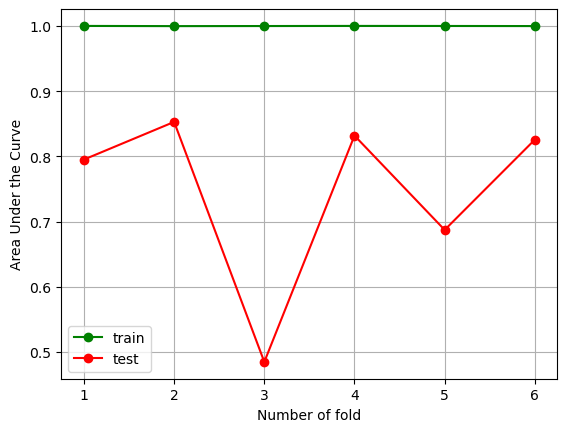

In [8]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [9]:
n_estimators = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_samples = [x / 10 for x in range(1, 11)]
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0]
bootstrap = [True, False]
bootstrap_features = [True, False]
oob_score = [True, False]
warm_start = [True, False]

random_grid = {
    'n_estimators':n_estimators,
    'max_samples':max_samples,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'bootstrap_features':bootstrap_features,
    'oob_score':oob_score,
    'warm_start':warm_start
}
print(random_grid)

{'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'oob_score': [True, False], 'warm_start': [True, False]}


In [10]:
dt_randomcv=RandomizedSearchCV(estimator=bagging,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.8, n_estimators=500, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.9, max_samples=0.6, n_estimators=900, oob_score=True, warm_start=True; total time=   0.0

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.4, max_samples=0.2, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.3, n_estimators=300, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_fea

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.4, max_samples=1.0, n_estimators=400, oob_score=False, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, max_samples=0.4, n_estimators=600, oob_score=False, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   4.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=1.0, n_estimators=1000, oob_score=True, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=Fa

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.3, n_estimators=200, oob_score=True, warm_start=False; total time=   0.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.2, max_samples=0.7, n_estimators=800, oob_score=False, warm_start=True; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_featur

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.7, n_estimators=200, oob_score=False, warm_start=True; total time=   0.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.7, max_samples=0.1, n_estimators=20, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.85, max_samples=0.6, n_estimators=600, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.7, max_samples=0.9, n_estimators=400, oob_score=False, warm_start=True; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.7, max_samples=0.9, n_estimators=400, oob_score=False, warm_start=True; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, max_samples=0.1, n_estimators=100, oob_score=False, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, max_samples=0.2, n_estimators=50, oob_score=True, warm_start=True; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_featur

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate only a

RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.85, 0.9, 0.92, 0.95,
                                                         1.0],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [20, 50, 100, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        

In [11]:
dt_randomcv.best_params_

{'warm_start': False,
 'oob_score': False,
 'n_estimators': 500,
 'max_samples': 0.3,
 'max_features': 0.8,
 'bootstrap_features': False,
 'bootstrap': True}

In [12]:
param_grid = {
    'n_estimators': [700, 800, 1000, 500, 300, 400],
    'max_features': [0.92, 0.95, 1.0, 0.6, 0.8, 0.75],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'warm_start': [False,True],
    'oob_score': [False,True]
}
print(param_grid)

{'n_estimators': [700, 800, 1000, 500, 300, 400], 'max_features': [0.92, 0.95, 1.0, 0.6, 0.8, 0.75], 'bootstrap': [True, False], 'bootstrap_features': [True, False], 'warm_start': [False, True], 'oob_score': [False, True]}


In [13]:
grid_search=GridSearchCV(estimator=bagging,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=700, oo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   4.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   4.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.6s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=False, warm_start=True; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   4.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=False, warm_start=True; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.6s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   4.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time= 5.2min
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=False, warm_start=True; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=False, warm_start=True; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=False, warm_start=True; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   5.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   5.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   6.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   5.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   5.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   5.4s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=False, warm_start=True; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bo

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   3.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.5s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=False, warm_start=True; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   4.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=False, warm_start=True; total time=   1.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   4.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   1.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   4.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   5.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.9s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   1.8s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   2.8s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=False, warm_start=True; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   3.5s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.8s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   1.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=False, warm_start=True; total time=   1.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   1.2s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.6s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   3.4s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=False, warm_start=True; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   4.6s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   2.4s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=False, warm_start=True; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=T

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.1s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   3.3s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   3.7s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   4.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   3.9s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   3.9s
[CV] END boot

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.2s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   2.3s
[CV] E

[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=False, warm_start=True; total time=   1.3s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.5s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   1.4s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   7.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=False, warm_start=True; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   5.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   5.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   7.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=False, warm_start=True; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   8.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   5.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.4s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=False, warm_start=True; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   3.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=False, warm_start=True; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=False, warm_start=True; total time=   1.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.3s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=False, warm_start=True; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.9s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   5.8s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.6s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.3s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.6s
[CV] E

[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=False, warm_start=True; total time=   2.1s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=True, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   7.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=700, oob_score=False, warm_start=False; total time=   6.0s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   7.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=False, warm_start=True; total time=   7.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=False, warm_start=True; total time=   2.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=False, warm_start=True; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.92, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   7.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   7.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   7.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=False, warm_start=True; total time=   7.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=500, oob_score=False, warm_start=False; total time=   4.2s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=False, warm_start=True; total time=   2.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=False, warm_start=True; total time=   2.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.95, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   8.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   7.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=700, oob_score=False, warm_start=False; total time=   6.2s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=False, warm_start=True; total time=   8.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   5.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   5.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   5.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   4.4s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=False, warm_start=True; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1.0, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=700, oob_score=False, warm_start=False; total time=   4.1s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=False, warm_start=True; total time=   5.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   3.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=500, oob_score=False, warm_start=False; total time=   2.9s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=False, warm_start=True; total time=   1.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.6, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   6.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   6.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=700, oob_score=False, warm_start=False; total time=   5.4s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=False, warm_start=True; total time=   6.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   4.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   4.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=False, warm_start=True; total time=   2.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.8, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.8s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   5.2s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=700, oob_score=False, warm_start=False; total time=   4.9s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   5.9s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=False, warm_start=True; total time=   6.4s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.6s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   4.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.7s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.5s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=500, oob_score=False, warm_start=False; total time=   3.6s

[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=False, warm_start=True; total time=   2.1s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=False, warm_start=True; total time=   2.3s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=0.75, n_estimators=300, oob_score=True, warm_start=False; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 354, in _fit
    raise ValueError("Out of bag estimate on

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.92, 0.95, 1.0, 0.6, 0.8, 0.75],
                         'n_estimators': [700, 800, 1000, 500, 300, 400],
                         'oob_score': [False, True],
                         'warm_start': [False, True]},
             verbose=2)

In [14]:
best_grid = grid_search.best_estimator_
best_grid

BaggingClassifier(bootstrap_features=True, max_features=0.6, n_estimators=300)

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

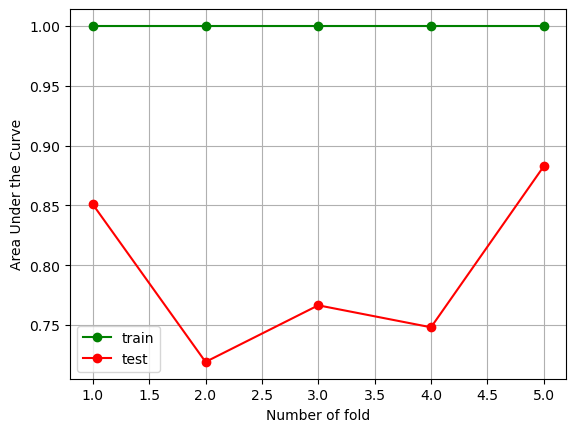

In [16]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[ 52   0]
 [  0 501]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00       501

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.00       553

Decision Tree Testing Result
[[  3   9]
 [  2 124]]
Auc Score 0.8826058201058201
Accuracy Score 0.9202898550724637
Classification report:               precision    recall  f1-score   support

         0.0       0.60      0.25      0.35        12
         1.0       0.93      0.98      0.96       126

    accuracy                           0.92       138
   macro avg       0.77      0.62      0.66       138
weighted avg       0.90      0.92      0.90       138



In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = boosting
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

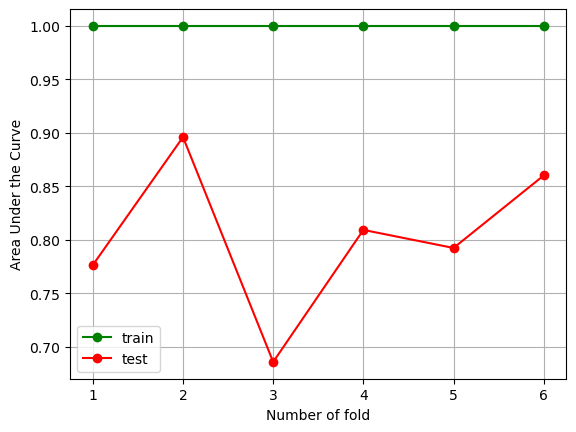

In [19]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [20]:
boosting = GradientBoostingClassifier()
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# max_features = list(range(1,train.shape[1]))

random_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
#     'max_features':max_features
}
print(random_grid)
boosting.get_params().keys()

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])}


dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [21]:
dt_randomcv=RandomizedSearchCV(estimator=boosting,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=22.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=29.0, min_samples_leaf=0.4, min_samples_split=0.30000000000000004, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=18.0, min_samples_leaf=0.1, min_samples_split=0.4, n_estimators=64; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=31.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=27.0, min_samples_leaf=0.2, min_samples_split=0.4, n_estim

[CV] END learning_rate=0.5, max_depth=21.0, min_samples_leaf=0.5, min_samples_split=0.4, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=12.0, min_samples_leaf=0.4, min_samples_split=0.2, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=12.0, min_samples_leaf=0.4, min_samples_split=0.2, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=12.0, min_samples_leaf=0.4, min_samples_split=0.2, n_estimators=16; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=14.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=25.0, min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=4; total time=   0.0

[CV] END learning_rate=0.25, max_depth=4.0, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=64; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=4.0, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=64; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=4.0, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=64; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=19.0, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=32; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=19.0, min_samples_leaf=0.2, min_samples_split=0.1, n_estimators=32; total time=

[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=1, max_depth=17.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=31.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=2; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=28.0, min_samples_leaf=0.30000000000000004, min_samples_split=0.7000000000000001, n_estimators=4; total time=   0.0s
[

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': [1, 2, 4, 8, 16, 32, 64,
                                                         100, 200]},
                   random_state=100, verbose=2)

In [22]:
dt_randomcv.best_params_

{'n_estimators': 8,
 'min_samples_split': 0.9,
 'min_samples_leaf': 0.1,
 'max_depth': 5.0,
 'learning_rate': 0.25}

In [23]:
param_grid = {
 'n_estimators': [8, 7, 5, 6, 9, 10],
 'min_samples_split': [ 0.75, 0.80, 0.85, 0.9, 1.0, 1.5],
 'min_samples_leaf': [0.4, 0.2, 0.25,0.1, 0.05],
 'max_depth': [5.0, 3.0, 2.0, 6.0, 7.0],
 'learning_rate': [0.25, 0.5, 0.1, 0.35]
}
print(param_grid)

{'n_estimators': [8, 7, 5, 6, 9, 10], 'min_samples_split': [0.75, 0.8, 0.85, 0.9, 1.0, 1.5], 'min_samples_leaf': [0.4, 0.2, 0.25, 0.1, 0.05], 'max_depth': [5.0, 3.0, 2.0, 6.0, 7.0], 'learning_rate': [0.25, 0.5, 0.1, 0.35]}


In [24]:
rid_search=GridSearchCV(estimator=boosting,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_le

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=8; total time=   0

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=  

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total t

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=

[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[C

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=  

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] 

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; tot

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[C

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV]

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total ti

[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learn

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END lea

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[C

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learn

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learn

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=10; total time=   0.0s

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[C

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END lea

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV]

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[C

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[C

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END 

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] 

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learni

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learni

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] 

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] E

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] 

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END 

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=10; total

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=

[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=5.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[C

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.25, min_samples_split=1.5, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=10; total time=

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=3.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time= 

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=8; total time=  

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=9; total time=

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.1, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV]

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=8; total

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=8; total time=

[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=2.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=10; total time=   0.

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.4, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.2, min_samples_split=1.5, n_estimators=8; total time=   0.0s
[C

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=5; total time=

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=6.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.85, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.4, min_samples_split=0.9, n_estimators=10; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.85, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.2, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV]

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.75, n_estimators=8; total time=

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.8, n_estimators=6; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.85, n_estimators=9; total time=

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.25, min_samples_split=1.0, n_estimators=8; total time=   

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.75, n_estimators=7; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.8, n_estimators=6; total time=   0.0s
[CV] END

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.85, n_estimators=10; total time=   0.0

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.9, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=8; total time=   0.0s
[CV]

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=8; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.75, n_estimators=7; total time=

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=7; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.8, n_estimators=5; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.85, n_estimators=6; total time=

[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=0.9, n_estimators=9; total time=   0.0s


[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.0, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.35, max_depth=7.0, min_samples_leaf=0.05, min_samples_split=1.5, n_estimators=8; total time= 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6000 fits failed out of a total of 36000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\hp\anaconda3\lib\site-packages

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.25, 0.5, 0.1, 0.35],
                         'max_depth': [5.0, 3.0, 2.0, 6.0, 7.0],
                         'min_samples_leaf': [0.4, 0.2, 0.25, 0.1, 0.05],
                         'min_samples_split': [0.75, 0.8, 0.85, 0.9, 1.0, 1.5],
                         'n_estimators': [8, 7, 5, 6, 9, 10]},
             verbose=2)

In [25]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingClassifier(learning_rate=0.25, max_depth=5.0,
                           min_samples_leaf=0.1, min_samples_split=0.9,
                           n_estimators=9)

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

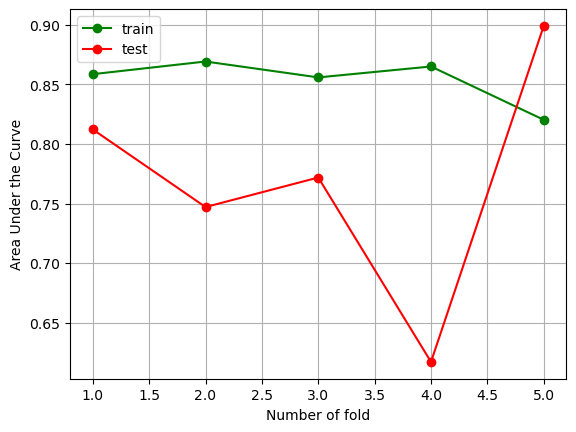

In [28]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[ 12  40]
 [  2 499]]
Auc Score 0.8203208966682021
Accuracy Score 0.9240506329113924
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.23      0.36        52
         1.0       0.93      1.00      0.96       501

    accuracy                           0.92       553
   macro avg       0.89      0.61      0.66       553
weighted avg       0.92      0.92      0.90       553

Decision Tree Testing Result
[[  4   8]
 [  2 124]]
Auc Score 0.8991402116402116
Accuracy Score 0.927536231884058
Classification report:               precision    recall  f1-score   support

         0.0       0.67      0.33      0.44        12
         1.0       0.94      0.98      0.96       126

    accuracy                           0.93       138
   macro avg       0.80      0.66      0.70       138
weighted avg       0.92      0.93      0.92       138



In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=6)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = stacking
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

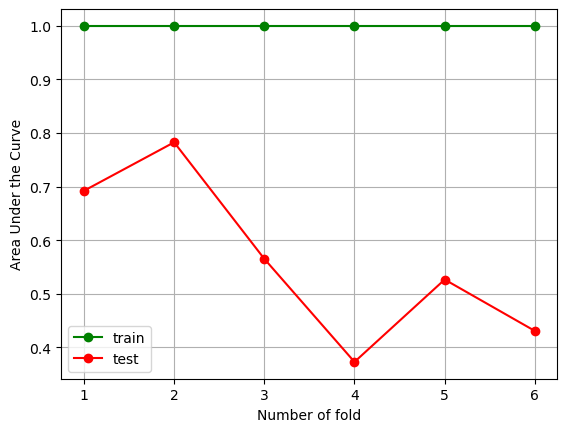

In [31]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,accuracy_score,classification_report
best_grid = stacking
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[ 53   0]
 [  0 523]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00       523

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Decision Tree Testing Result
[[  3   8]
 [  1 103]]
Auc Score 0.430506993006993
Accuracy Score 0.9217391304347826
Classification report:               precision    recall  f1-score   support

         0.0       0.75      0.27      0.40        11
         1.0       0.93      0.99      0.96       104

    accuracy                           0.92       115
   macro avg       0.84      0.63      0.68       115
weighted avg       0.91      0.92      0.90       115

